In [5]:
#BoomBikes Case study using Linear Regression 
#Case-study by Sabyasachi Praharaj
# Begin with importing required python libraries 

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings

In [6]:
# Read the Bike sharing data set 

bike = pd.read_csv(r'C:\Users\I066565\Desktop\bike_rental\day.csv')

In [7]:
#initial look at the data
bike.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:

#initial look at the data columns
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [10]:
#initial look at the data shape
bike.shape


(730, 16)

In [11]:
#initial look at the data types and missing values 
bike.info()

#No missing values from the information below 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [12]:
####################### Understanding the Dataframe #####################


#Validating the overall data descriptions of each column 
bike.describe()

#Apart from the date all other Dataframe columns are NUmerical 

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [13]:


#splitting the dataframe into three diffrent dataframes for analysis and visualisation


#on basis of the season ,month and year 
bike_temp1 = bike[ [ 'dteday' , 'season', 'yr', 'mnth',  'casual','registered', 'cnt'] ].copy()

#on basis of the weather and climatic condition
bike_temp2 = bike[ ['weathersit', 'temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt'] ].copy()


#on basis of calendar days
bike_temp3 = bike[ ['weekday','workingday','holiday','casual', 'registered', 'cnt'] ].copy()




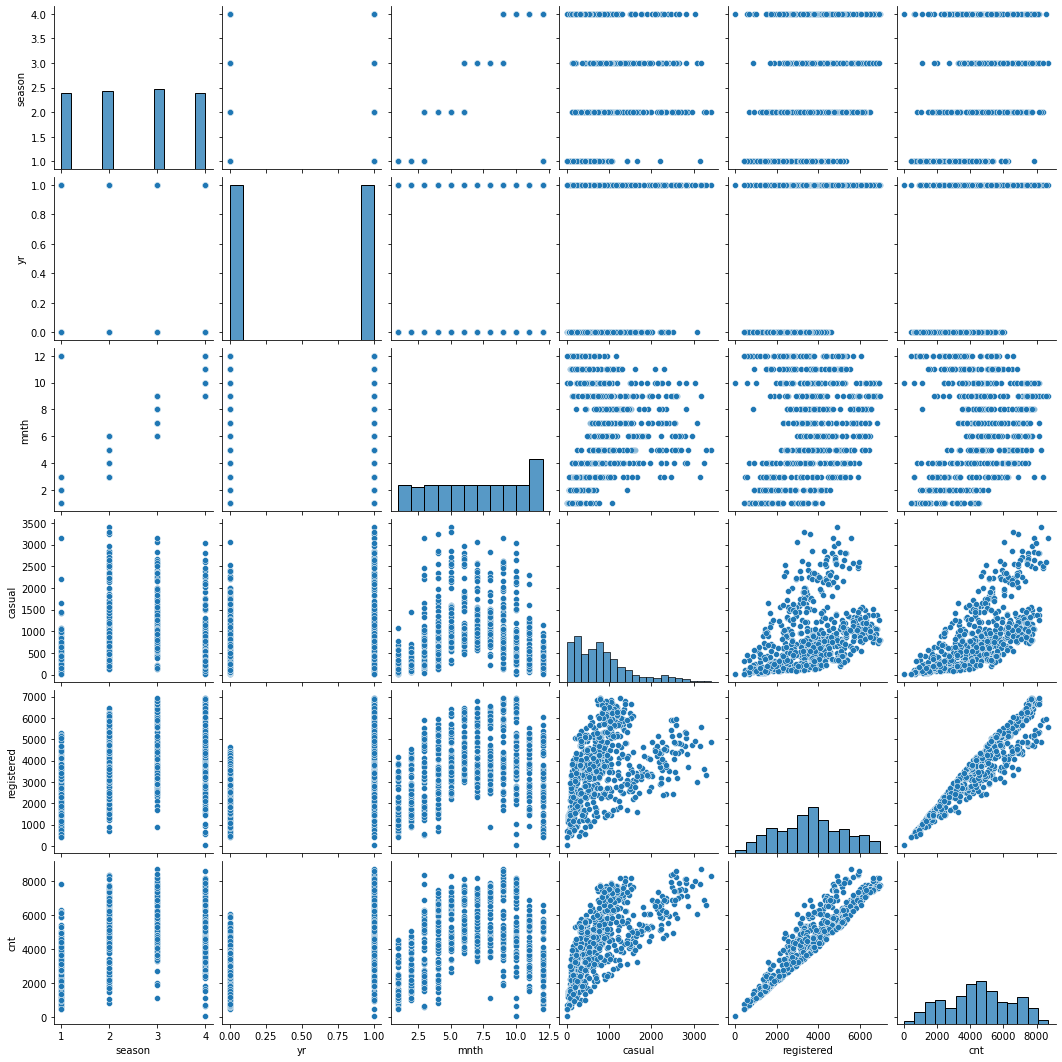

In [24]:
# Split visualisations to have a better understanding of the dataframe 
#on basis of the season ,month and year 
sns.pairplot(bike_temp1)



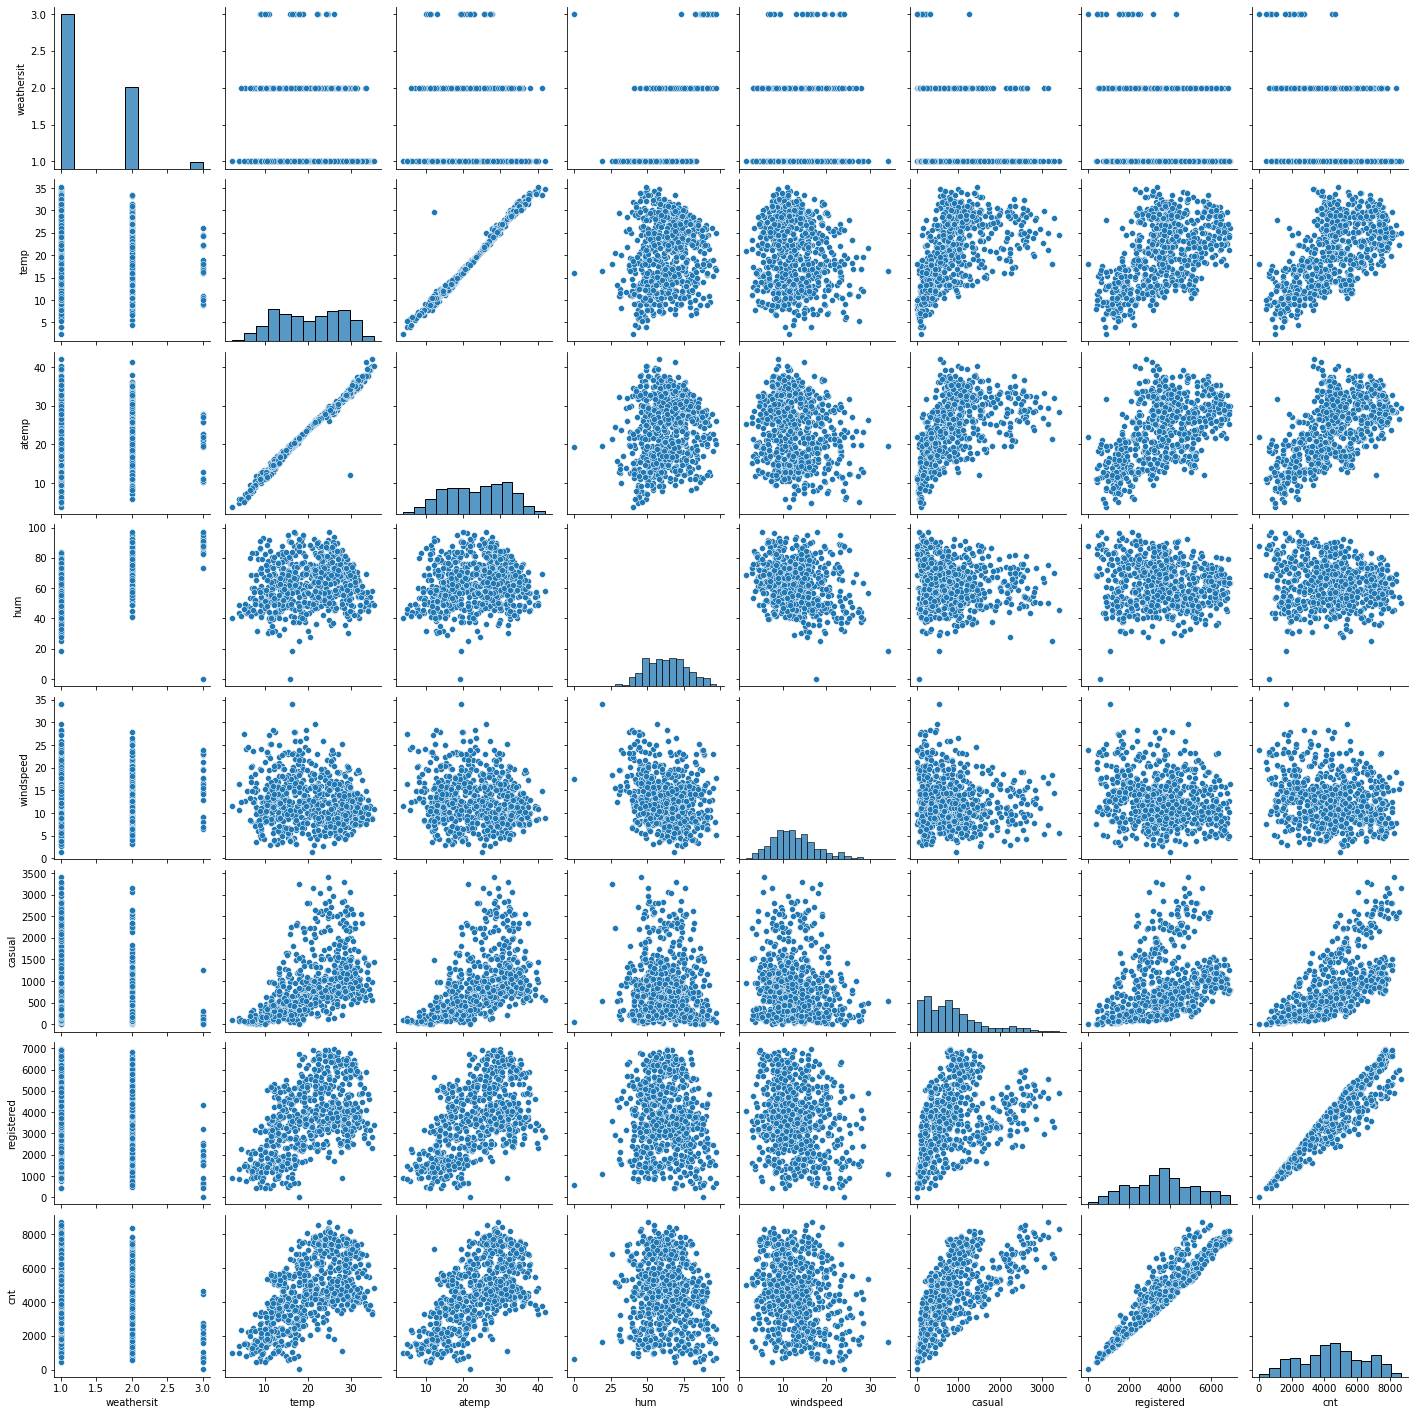

In [312]:
#on basis of the weather and climatic condition
sns.pairplot(bike_temp2)

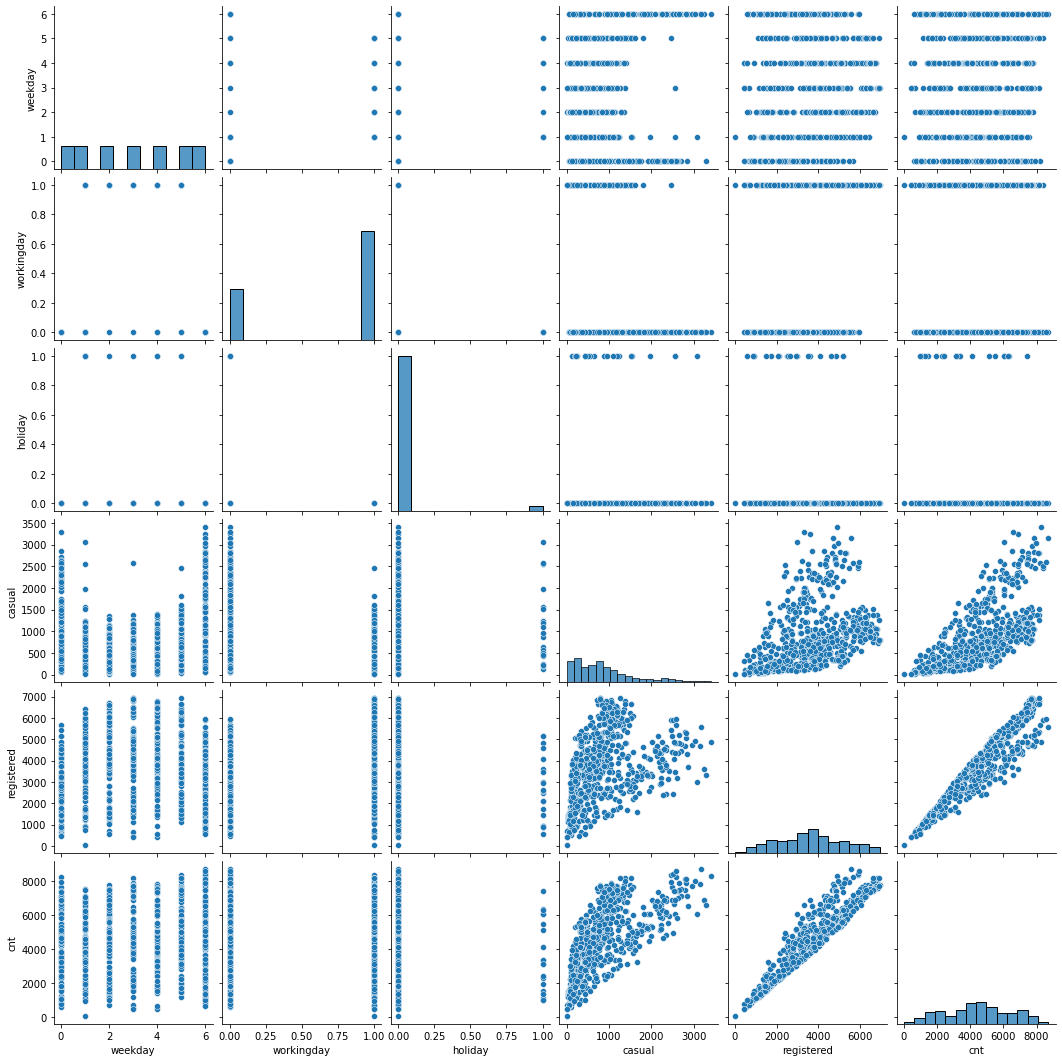

In [26]:
#on basis of calendar days
sns.pairplot(bike_temp3)

In [14]:
#Deeper look at the number of entries

print(bike['holiday'].value_counts())
print(bike['workingday'].value_counts())
print(bike['weekday'].value_counts())



0    709
1     21
Name: holiday, dtype: int64
1    499
0    231
Name: workingday, dtype: int64
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64


In [15]:
#the column holiday in the bike data frame doesnt make much of an impact as per the plot analysis
#and the number of holidays being very less will not have much impact on the analysis 

bike.drop('holiday' , inplace=True, axis=1)

#removing 'instant', 'dteday' since they do not have any impact on the analysis 
bike.drop(['instant', 'dteday'] , inplace=True, axis=1)


In [16]:
bike.columns

Index(['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

In [17]:
#Splitting bike data frame into training and test data for regression modelling

df_train , df_test = train_test_split(bike , train_size = 0.7 , random_state = 100)

In [18]:
print(df_train.shape)
print(df_test.shape)

(510, 13)
(220, 13)


In [19]:
#######################  Scaling   ###################

#Standardisation scaling for the numeric variables of 'season', 'mnth' , 'weekday','weathersit'

scaler = StandardScaler()

scaledf = ['season', 'mnth' , 'weekday','weathersit']

df_train[scaledf] = scaler.fit_transform(df_train[scaledf])



In [20]:
df_train.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
576,0.438423,1,0.132531,-0.491384,1,-0.737958,29.246653,33.1448,70.4167,11.083475,968,6248,7216
426,-1.364767,1,-1.022865,1.493614,0,1.089025,16.980847,20.6746,62.1250,10.792293,956,3110,4066
728,-1.364767,1,1.576776,-1.483884,0,-0.737958,10.489153,11.5850,48.3333,23.500518,364,1432,1796
482,-0.463172,1,-0.734016,1.493614,0,1.089025,15.443347,18.8752,48.9583,8.708325,1120,3100,4220
111,-0.463172,0,-0.734016,0.997364,1,1.089025,13.803347,16.0977,72.9583,14.707907,177,1506,1683


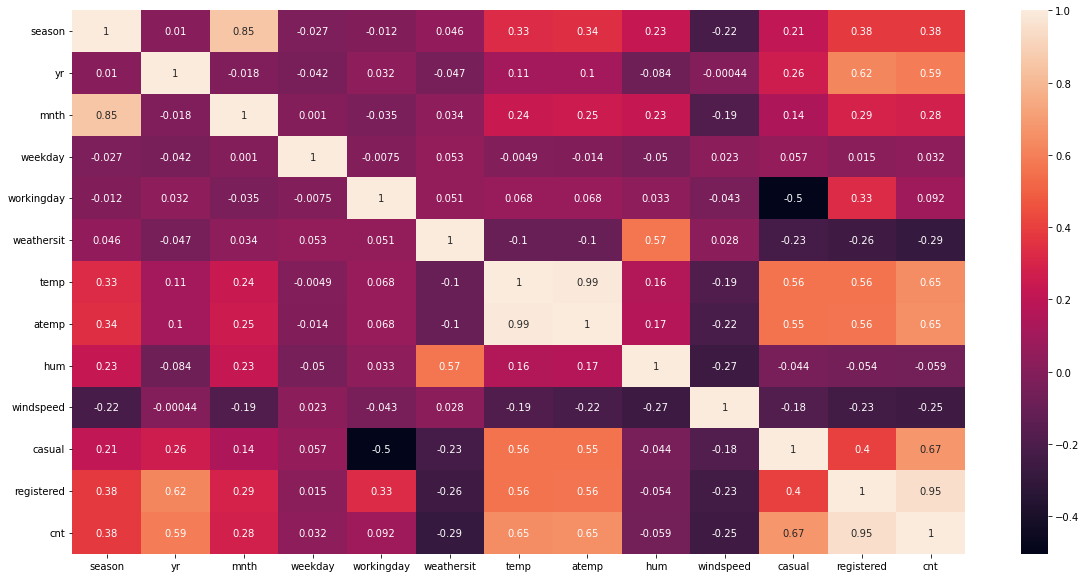

In [21]:
# plotting a heat map to check the co-efficients of each variable compared to the other 

plt.figure(figsize = (20 , 10 ))
sns.heatmap(df_train.corr(), annot=True )
plt.show()

In [22]:

# The y training set
y_train = df_train.pop("cnt")
X_train = df_train


In [23]:
X_train.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
576,0.438423,1,0.132531,-0.491384,1,-0.737958,29.246653,33.1448,70.4167,11.083475,968,6248
426,-1.364767,1,-1.022865,1.493614,0,1.089025,16.980847,20.6746,62.1250,10.792293,956,3110
728,-1.364767,1,1.576776,-1.483884,0,-0.737958,10.489153,11.5850,48.3333,23.500518,364,1432
482,-0.463172,1,-0.734016,1.493614,0,1.089025,15.443347,18.8752,48.9583,8.708325,1120,3100
111,-0.463172,0,-0.734016,0.997364,1,1.089025,13.803347,16.0977,72.9583,14.707907,177,1506


In [24]:
#######################  Building the model  ###################

# Creating the model only for one parameter  since the temp 
# is having a coefficient of 0.65 (as depicted in headt map above) with cnt 
# first model is created using the parameter temp 

#add constant for stats 
X_train_sm = sm.add_constant(X_train['temp'])

#create the model 
lr_bike = sm.OLS(y_train, X_train_sm)

#fit the model 
lr_bikemodel = lr_bike.fit()

In [324]:
lr_bikemodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           2.46e-61
Time:                        02:58:07   Log-Likelihood:                -4449.7
No. Observations:                 510   AIC:                             8903.
Df Residuals:                     508   BIC:                             8912.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1080.7400    190.751      5.666      0.000     705.982    1455.498
temp         169.3134      8.899     19.026      0.000     151.830     186.797
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         62.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [325]:
X_train.columns

Index(['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'casual', 'registered'],
      dtype='object')

In [25]:
# Creating the model only for all available parameters in the data set . 

#add constant for stats 
X_train_set = X_train[ [ 'season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed' ] ]

X_train_sm = sm.add_constant(X_train_set)

#create the model 
lr_bike = sm.OLS(y_train, X_train_sm)

#fit the model 
lr_bikemodel = lr_bike.fit()

In [327]:
lr_bikemodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     201.9
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          2.96e-168
Time:                        02:58:15   Log-Likelihood:                -4174.2
No. Observations:                 510   AIC:                             8370.
Df Residuals:                     499   BIC:                             8417.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1743.7121    310.119      5.623      0.000    1134.413    2353.011
season       457.4174     77.036      5.938      0.000     306.063     608.772
yr          2042.5998     78.761     25.934      0.000    1887.855    2197.344
mnth         -50.5912     75.046     -0.674      0.501    -198.037      96.854
weekday      147.7970     39.269      3.764      0.000      70.644     224.950
workingday   214.0651     83.596      2.561      0.011      49.821     378.309
weathersit  -371.9778     50.129     -7.420      0.000    -470.468    -273.488
temp          53.3354     37.005      1.441      0.150     -19.369     126.040
atemp         68.1100     34.287      1.986      0.048       0.745     135.475
hum           -8.7223      3.736     -2.335      0.020     -16.063      -1.382
windspeed    -43.8652      8.055     -5.446      0.000     -59.690     -28.040
==============================================================================
Omnibus:                       67.868   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.325
Skew:                          -0.691   Prob(JB):                     1.26e-36
Kurtosis:                       5.423   Cond. No.                         585.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [328]:
X_train.shape[1]
X_train.columns

Index(['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'casual', 'registered'],
      dtype='object')

In [26]:
# Initial look 
#the p-value is pretty high for month and temp as comapred to the interval of 0.05 .
#Calculation of the VIF will give more information about which variable to drop 

#######################  VIF   ###################
#variance inflation factor (VIF)

#vif dataframe 
VIF = pd.DataFrame()


VIF['Features'] = X_train_set.columns

#VIF calculation using the statmodels library 
VIF['VIF'] = [variance_inflation_factor(X_train_set.values, i) for i in range(X_train_set.shape[1])]


VIF['VIF']  = round(VIF['VIF'] , 2)
VIF = VIF.sort_values(by = 'VIF' , ascending = False)







In [28]:
print(VIF)

     Features     VIF
7       atemp  456.88
6        temp  402.47
8         hum   15.23
9   windspeed    5.21
0      season    3.92
2        mnth    3.73
4  workingday    3.04
1          yr    2.04
5  weathersit    1.32
3     weekday    1.01


In [30]:
# since atemp has a extremely high VIF value so creating a new model without variable a_temp

#add constant for stats 
X_train_set = X_train[ [ 'season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed' ] ]

X_train_sm = sm.add_constant(X_train_set)

#create the model 
lr_bike = sm.OLS(y_train, X_train_sm)

#fit the model 
lr_bikemodel = lr_bike.fit()

lr_bikemodel.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     222.5
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          1.37e-168
Time:                        20:53:31   Log-Likelihood:                -4176.2
No. Observations:                 510   AIC:                             8372.
Df Residuals:                     500   BIC:                             8415.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1882.5798    303.025      6.213      0.000    1287.220    2477.940
season       461.6920     77.232      5.978      0.000     309.952     613.432
yr          2042.0000     78.992     25.851      0.000    1886.802    2197.198
mnth         -51.4590     75.266     -0.684      0.494    -199.335      96.417
weekday      143.7418     39.331      3.655      0.000      66.467     221.016
workingday   214.5645     83.842      2.559      0.011      49.839     379.290
weathersit  -378.0270     50.184     -7.533      0.000    -476.624    -279.430
temp         125.9390      5.808     21.686      0.000     114.529     137.349
hum           -8.1459      3.736     -2.181      0.030     -15.486      -0.806
windspeed    -46.5621      7.963     -5.847      0.000     -62.207     -30.917
==============================================================================
Omnibus:                       60.383   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.372
Skew:                          -0.626   Prob(JB):                     7.36e-32
Kurtosis:                       5.276   Cond. No.                         539.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
#recalculating VIF without the variale atemp

#vif dataframe 
VIF = pd.DataFrame()


VIF['Features'] = X_train_set.columns

#VIF calculation using the statmodels library 
VIF['VIF'] = [variance_inflation_factor(X_train_set.values, i) for i in range(X_train_set.shape[1])]


VIF['VIF']  = round(VIF['VIF'] , 2)
VIF = VIF.sort_values(by = 'VIF' , ascending = False)

print(VIF)

     Features    VIF
7         hum  12.61
6        temp   9.67
8   windspeed   5.20
0      season   3.92
2        mnth   3.73
4  workingday   3.03
1          yr   2.03
5  weathersit   1.27
3     weekday   1.01


In [32]:
# Again hum has a very VIF value creating a new model by removing the variable hum
X_train_set = X_train[ [ 'season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp',  'windspeed' ] ]

#add constant for stats 
X_train_sm = sm.add_constant(X_train_set)

#create the model 
lr_bike = sm.OLS(y_train, X_train_sm)

#fit the model 
lr_bikemodel = lr_bike.fit()

lr_bikemodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     247.9
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          8.87e-169
Time:                        20:53:42   Log-Likelihood:                -4178.6
No. Observations:                 510   AIC:                             8375.
Df Residuals:                     501   BIC:                             8413.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1340.8025    174.115      7.701      0.000     998.716    1682.889
season       464.9235     77.507      5.998      0.000     312.645     617.202
yr          2058.7402     78.912     26.089      0.000    1903.700    2213.780
mnth         -68.8404     75.122     -0.916      0.360    -216.434      78.753
weekday      152.8733     39.254      3.894      0.000      75.751     229.996
workingday   217.2653     84.146      2.582      0.010      51.943     382.588
weathersit  -445.6099     39.616    -11.248      0.000    -523.445    -367.775
temp         123.5832      5.727     21.577      0.000     112.330     134.836
windspeed    -41.5273      7.649     -5.429      0.000     -56.556     -26.499
==============================================================================
Omnibus:                       59.211   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.058
Skew:                          -0.622   Prob(JB):                     1.73e-30
Kurtosis:                       5.214   Cond. No.                         112.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#recalculating VIF without the variale hum

#vif dataframe 
VIF = pd.DataFrame()


VIF['Features'] = X_train_set.columns

#VIF calculation using the statmodels library 
VIF['VIF'] = [variance_inflation_factor(X_train_set.values, i) for i in range(X_train_set.shape[1])]


VIF['VIF']  = round(VIF['VIF'] , 2)
VIF = VIF.sort_values(by = 'VIF' , ascending = False)

print(VIF)

     Features   VIF
6        temp  5.27
7   windspeed  4.23
0      season  3.87
2        mnth  3.67
4  workingday  2.86
1          yr  2.03
5  weathersit  1.02
3     weekday  1.01


In [35]:
# the variable month  has a very p value in the previous summary 
#Removing  the variable mnth from the model 
X_train_set = X_train[ [ 'season', 'yr', 'weekday', 'workingday', 'weathersit', 'temp',  'windspeed' ] ]

#add constant for stats 
X_train_sm = sm.add_constant(X_train_set)

#create the model 
lr_bike = sm.OLS(y_train, X_train_sm)

#fit the model 
lr_bikemodel = lr_bike.fit()

lr_bikemodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     283.3
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          7.72e-170
Time:                        20:55:01   Log-Likelihood:                -4179.0
No. Observations:                 510   AIC:                             8374.
Df Residuals:                     502   BIC:                             8408.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1327.5232    173.484      7.652      0.000     986.680    1668.367
season       405.3689     42.227      9.600      0.000     322.405     488.333
yr          2061.7053     78.833     26.153      0.000    1906.821    2216.589
weekday      151.2413     39.207      3.857      0.000      74.211     228.271
workingday   220.2368     84.070      2.620      0.009      55.064     385.409
weathersit  -444.8331     39.601    -11.233      0.000    -522.637    -367.029
temp         123.9862      5.710     21.715      0.000     112.768     135.204
windspeed    -41.3979      7.647     -5.414      0.000     -56.421     -26.375
==============================================================================
Omnibus:                       58.257   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.086
Skew:                          -0.615   Prob(JB):                     7.65e-30
Kurtosis:                       5.190   Cond. No.                         112.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
#recalculating VIF without the variable mnth

#vif dataframe 
VIF = pd.DataFrame()


VIF['Features'] = X_train_set.columns

#VIF calculation using the statmodels library 
VIF['VIF'] = [variance_inflation_factor(X_train_set.values, i) for i in range(X_train_set.shape[1])]


VIF['VIF']  = round(VIF['VIF'] , 2)
VIF = VIF.sort_values(by = 'VIF' , ascending = False)

print(VIF)

     Features   VIF
5        temp  5.26
6   windspeed  4.22
3  workingday  2.86
1          yr  2.02
0      season  1.16
4  weathersit  1.02
2     weekday  1.01


In [ ]:
#The VIF looks
ok for all features and even the p value of the model looks decent and as per the 
interval . this model looks absolutely ok now as per the standards .

the R2 value of 0.79 looks decent and 



FOr confirmation the next step of residual analysis and test set analysis follows 

In [37]:
#######################  Residual Analysis  ###################

y_train_pred = lr_bikemodel.predict(X_train_sm)
res = y_train - y_train_pred

C:\Users\I066565\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

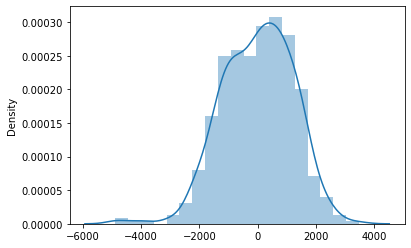

In [338]:
sns.distplot(res)

#the visualisation of the residual analysis depicts that the 
#residual distribution is centered around 0 which a very normal 
#distribution as shown in the distribution below 



In [38]:
df_test.shape

(220, 13)

In [39]:
#predictions on test set 

#transform test set  Data 

scaledf = ['season', 'mnth' , 'weekday', 'weathersit']
df_test[scaledf] = scaler.transform(df_test[scaledf])

In [40]:
df_test.head()


,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
184,0.438423,0,0.132531,-0.987634,0,1.089025,29.793347,33.27085,63.7917,5.459106,3065,2978,6043
535,-0.463172,1,-0.156318,0.004865,1,-0.737958,32.082500,36.04875,59.2083,7.625404,872,5339,6211
299,1.340018,0,0.999078,0.501115,1,1.089025,19.270000,22.85230,81.2917,13.250121,240,2419,2659
221,0.438423,0,0.421380,0.004865,1,-0.737958,31.433347,34.24915,42.4167,13.417286,884,3896,4780
152,-0.463172,0,-0.156318,0.501115,1,-0.737958,29.315000,32.19710,30.5000,19.583229,736,4232,4968


In [41]:

y_test = df_test.pop('cnt')
X_test = df_test

In [42]:
#building the model for the test data
#creating the test set by dropping the required variables
X_test_set = X_test[ [ 'season', 'yr','weekday', 'workingday', 'weathersit', 'temp', 'windspeed' ] ]

#add constant for for the test set  
X_test_sm = sm.add_constant(X_test_set)


In [43]:
#prediction on test set 
y_test_pred = lr_bikemodel.predict(X_test_sm)

In [44]:
#Evaluate the test set 
#find the R2 score

r2_score( y_true = y_test  , y_pred = y_test_pred)

0.7779935472595146

In [ ]:
########################### Analysis & conclusion ####################################

the R2_score of the test set = 0.77  (77%)
the R2 score of the trains set = 0.79 (79%)
the analysis is relatively close between the train and test set .

the multiple linear regression model here depicts that 

1) the variable season is extremely significant . the bike sharing is in demand in the appropriate 
   seasons 
    
2) the Year variable is significant as well. Its  a general trend and our analysis also showcases that here
    the demand of bikes is higher with the increment in year . though we have only two years 
    data in here 
    
3) the variable temp is extremely significant .     
    
    




